In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
import itertools
import math
import numpy as np

In [ ]:
# exemplo 1
img = mpimg.imread('planta_mercado.png', format='png')

plt.imshow(img)

pontos_interesse = {
    "Entrada": (500.49, 438.34),
    "Saída": (198.88, 455.65),
    "Carne": (415.79, 36.19),
    "Padaria": (120.44, 378.68),
    "Bebidas": (237.18, 128.26),
    "Feirinha": (596.24, 145.57),
    "Checkout": (463.81, 385.77)
}

for ponto, coordenadas in pontos_interesse.items():
    x, y = coordenadas
    plt.scatter(x, y, label=ponto)

plt.legend()

plt.show()

In [ ]:
# exemplo 2
pontos_interesse = {
    "Entrada": (500.49, 438.34),
    "Saída": (198.88, 455.65),
    "Carne": (415.79, 36.19),
    "Padaria": (120.44, 378.68),
    "Bebidas": (237.18, 128.26),
    "Feirinha": (596.24, 145.57),
    "Checkout": (463.81, 385.77)
}

# Inicialização do grafo
G = nx.Graph()

# Adição dos nós ao grafo
for ponto, coordenadas in pontos_interesse.items():
    G.add_node(ponto, pos=coordenadas)

# Conexão de todos os pontos entre si e adição das arestas ao grafo
# Com cálculo da distância euclidiana entre eles para uso como peso
for (ponto1, pos1), (ponto2, pos2) in itertools.combinations(pontos_interesse.items(), 2):
    # Calcula a distância euclidiana
    peso = math.hypot(pos2[0] - pos1[0], pos2[1] - pos1[1])
    G.add_edge(ponto1, ponto2, weight=peso)

# Carregar a imagem da planta do supermercado
img = mpimg.imread('planta_mercado.png', format='png')
fig, ax = plt.subplots()

# Mostrar a imagem
ax.imshow(img)

# Obter as posições dos nós e desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, ax=ax, node_color='blue', with_labels=True, node_size=50)

# Obter as arestas e desenhar com estilo tracejado
edges = G.edges()
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges, style='dashed', width=2, edge_color='red')

# Inverter o eixo y após desenhar os nós e arestas para corresponder ao sistema de coordenadas da imagem
plt.gca().invert_yaxis()

# Ajusta os limites do plot para coincidir com a imagem
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Remove os eixos para uma visualização mais limpa
plt.axis('off')

# Mostrar o gráfico final
plt.show()

In [ ]:
# exemplo 3
img = mpimg.imread('croqui.png')
fig, ax = plt.subplots()

# Mostra a imagem
ax.imshow(img)

# Defina os limites do eixo com base nas dimensões da imagem
# Isso depende de como você definiu a grade sobre a imagem
ax.set_xlim(0, img.shape[1])
ax.set_ylim(0, img.shape[0])

# A rota que você quer traçar, com coordenadas ajustadas à escala da imagem
# A lista abaixo é apenas um exemplo, você terá que ajustar as coordenadas para a sua aplicação específica
rota = [(80.76,328.55),
(80.76,78.51),
(193.28,81.98),
(327.33,78.51),
(415.54,79.90),
(605.15,79.20),
(605.85,189.64),
(414.84,184.78),
(413.46,298.68),
(601.68,296.60),
(526.67,327.85),
(442.63,330.63),
(359.28,391.06)]

# Desenhe a rota na imagem
x_coords, y_coords = zip(*rota)
ax.plot(x_coords, y_coords, marker='o', color='red', linestyle='dashed', linewidth=2)

# Marcar os pontos com um círculo e texto
for (x, y) in rota:
    ax.scatter(x, y, color='red', s=50)  # desenhar circulo
    ax.text(x, y, f"({x},{y})", color='white', ha='right')  # anotar a coordenada

# Inverter o eixo y para que os pontos correspondam à sua localização na imagem
plt.gca().invert_yaxis()

# Remove os eixos para uma visualização mais limpa
plt.axis('off')

# Mostrar o grafico
plt.show()

In [ ]:
# função nome de quadrantes
def gerar_quadrados(largura, altura):
    quadrados = []
    nome_sequencia = 1 
    for x in range(largura):
        for y in range(altura):
            nome = f"C{nome_sequencia:02d}"
            quadrado = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
            cor = "green" if (x + y) % 2 == 0 else "lightgreen"  # Cores alternadas para os quadrados
            quadrados.append({"quadrado": quadrado, "nome": nome, "cor": cor})
            nome_sequencia += 1
    return quadrados

# Criando os quadrados com a função gerar_quadrados para um espaço de 30x20
quadrados = gerar_quadrados(30, 20)

for quadrado in quadrados:
    x, y = quadrado["quadrado"].exterior.xy
    plt.plot(x, y, color=quadrado["cor"], alpha=0.1)  # Desenha o contorno dos quadrados com baixa opacidade
    plt.fill(x, y, color=quadrado["cor"], alpha=0.1)  # Preenche os quadrados com baixa opacidade
    
    centroide = quadrado["quadrado"].centroid
    plt.text(
        centroide.x, 
        centroide.y, 
        f'{quadrado["nome"]}',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8
    )

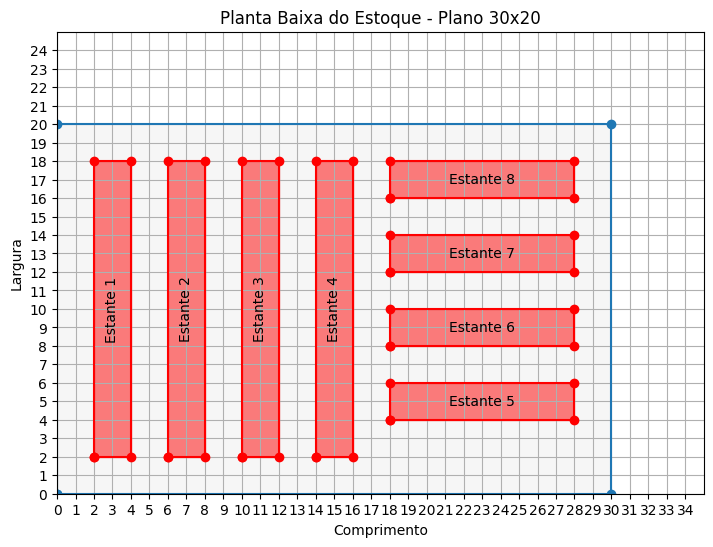

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Criando o plano do estoque como antes
plano_estoque = Polygon([(0, 0), (30, 0), (30, 20), (0, 20)])
x, y = plano_estoque.exterior.xy

# Definindo as estantes como polígonos menores dentro do plano
estantes_v = [
    {"poligono": Polygon([(2, 2), (4, 2), (4, 18), (2, 18)]), "nome": "1", "cor": "red"},
    {"poligono": Polygon([(6, 2), (8, 2), (8, 18), (6, 18)]), "nome": "2", "cor": "red"},
    {"poligono": Polygon([(10, 2), (12, 2), (12, 18), (10, 18)]), "nome": "3",  "cor": "red"},
    {"poligono": Polygon([(14, 2), (16, 2), (16, 18), (14, 18)]), "nome": "4",  "cor": "red"},
]

estantes_h = [
    {"poligono": Polygon([(18, 4), (28, 4), (28, 6), (18, 6)]), "nome": "5",  "cor": "red"},
    {"poligono": Polygon([(18, 8), (28, 8), (28, 10), (18, 10)]), "nome": "6",  "cor": "red"},
    {"poligono": Polygon([(18, 12), (28, 12), (28, 14), (18, 14)]), "nome": "7",  "cor": "red"},
    {"poligono": Polygon([(18, 16), (28, 16), (28, 18), (18, 18)]), "nome": "8",  "cor": "red"},
]

# Iniciando a plotagem
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')  # Desenha o retângulo do plano
plt.fill(x, y, alpha=0.2, color='lightgrey')  # Preenche o plano


# Desenhando e nomeando cada estante
for estante in estantes_v:
    x, y = estante["poligono"].exterior.xy
    plt.plot(x, y, color=estante["cor"], marker='o')
    plt.fill(x, y, color=estante["cor"], alpha=0.5)  # Pode alterar a cor se desejar distinguir as estantes

    # Calculando o centroide da estante para posicionar o nome
    centroide = estante["poligono"].centroid
    plt.text(
        centroide.x, 
        centroide.y, 
        f'Estante {estante["nome"]}',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=90
    )

for estante in estantes_h:
    x, y = estante["poligono"].exterior.xy
    plt.plot(x, y, color=estante["cor"], marker='o')
    plt.fill(x, y, color=estante["cor"], alpha=0.5)  # Pode alterar a cor se desejar distinguir as estantes

    # Calculando o centroide da estante para posicionar o nome
    centroide = estante["poligono"].centroid
    plt.text(
        centroide.x, 
        centroide.y, 
        f'Estante {estante["nome"]}',
        horizontalalignment='center',
        verticalalignment='center'
    )


plt.title("Planta Baixa do Estoque - Plano 30x20")
plt.xlim(0, 35)  # Define limites para x para melhor visualização
plt.ylim(0, 25)  # Define limites para y para melhor visualização
plt.xlabel("Comprimento")
plt.ylabel("Largura")

plt.xticks(range(0, 35, 1))
plt.yticks(range(0, 25, 1))

plt.grid(True)  # Adiciona uma grade para facilitar a visualização das medidas
plt.gca().set_aspect('equal', adjustable='box')  # Mantém a proporção 1:1 entre x e y
plt.show()
